In [1]:
from Zebrafish_model import *
from PIL import Image

In [2]:
zebra_model = ZebraMol()

{input={1}}


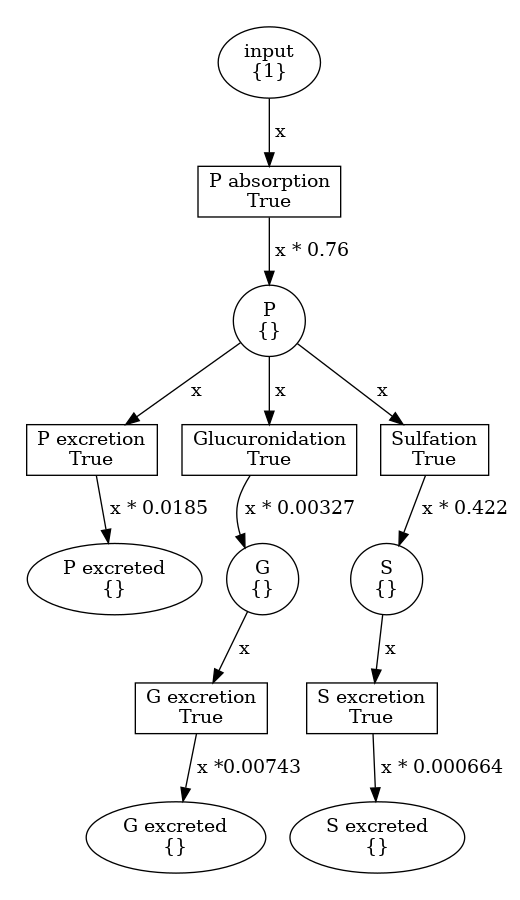

In [3]:
net = zebra_model.net
net.add_marking(Marking(input=([1])))
print(net.get_marking())
net.draw('temp/test.png', engine='dot')
Image.open('temp/test.png')

In [4]:
s = Substitution()
net.transition('P absorption').fire(Substitution(x=1))

In [5]:
net.transition('P absorption').modes()

[]

In [6]:
net.get_marking()

Marking({'P': MultiSet([0.76])})

In [7]:
net.transition('Sulfation').fire(Substitution(x=0.76))

In [8]:
net.get_marking()

Marking({'S': MultiSet([0.32072])})

In [10]:

basic = PetriNet('basic')
basic.add_place(Place('e', status=entry))
basic.add_place(Place('x', status=exit))
basic.add_transition(Transition('t'))
basic.add_input('e', 't', Value(dot))
basic.add_output('x', 't', Value(dot))
basic.add_place(Place('b1', [1], status=buffer('egg')))
basic.add_place(Place('b2', [2], status=buffer('spam')))
basic.add_input('b1', 't', Variable('x'))
basic.add_output('b2', 't', Expression('x+1'))

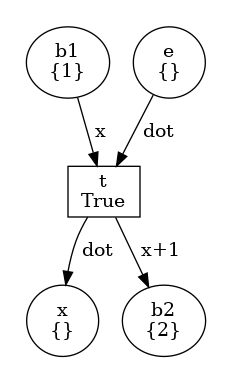

In [15]:
n = basic | basic 
n.status(buffer('egg'))
n.status(buffer('spam'))
basic.draw('temp/test.png', engine='dot')
Image.open('temp/test.png')

(0.0, 30.0)

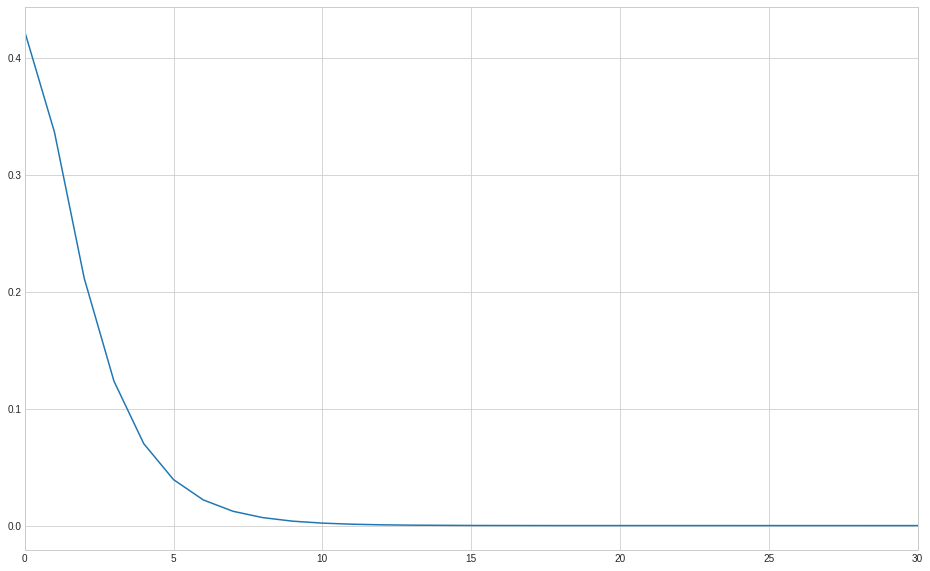

In [6]:
import numpy as np
import matplotlib.pyplot as plt
a = np.load('test.npy')
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(16,10))
plt.plot(a)
plt.xlim(0,30)
